## Projeto Milk Temperature

### Objective:
- In this project we are going to the investigative phase of Milk_Diagnostic (a device for collecting and sending milk data on the farm via SMS), we are going to carry out a survey of the variation in milk temperature over a given period. Here we will make a prediction of these temperatures, using reinforcement learning for the next few minutes to alert both the producer and the collecting company about a possible spike in the temperature of the milk stored on the farm, before the event happens.

- Nesse projeto vamos para a fase investigatória do Milk_Diagnostic (aparelho de coleta e envio de dados do leite na fazenda via sms), vamos fazer um levantamento da variação da temperatura do leite em determinado período. Aqui vamos fazer uma predição dessas temperaturas, utilizando aprendizado por reforço para os próximos minutos para alertar tanto o produtor quanto a empresa captadora sobre um possível pico da temperatura do leite armazenado na fazenda, antes que o evento aconteça.

### Data Origin:
- Dataset: MILK_temperature.TXT

- Through the Milk_Diagnostic equipment (device for collecting and sending milk data on the farm via SMS) data on milk temperature, ambient temperature, date, time, humidity, geographic coordinates, are transferred daily from the farm's milk reservoir every 10 minutes (configurable), 24 hours a day, 7 days a week.

- Através do equipamento Milk_Diagnostic (aparelho de coleta e envio de dados do leite na fazenda via sms)os dados de temperatura do leite, temperatura ambiente, data, hora, umidade, coordenadas geográficas, são transferidos diariamente do reservatório de leite da fazenda a cada 10 minutos (configurável), 24 horas por dia durante os 7 dias da semana.

- Aqui está o que as colunas representam:

    local: identificador da fazendo origem do leite
    data: data da coleta da temperatura
    hora: hora, minutos e segundos da coleta da temperatura
    lat: latitude do local da fazenda
    long: longitude do local da fazenda
    umidade: umidade ambiente do local do tanque de leite
    t_ex: temperatura ambiente do local do tanque de leite
    t1, t2, t3, t4, t5, t6, t7, t8: 
        temperaturas coletadas dentro do intervalo configurado para envio (10 minutos para esse trabalho)


- ## Análise exploratória dos dados
- ## Preparação dos dados
- ## Armazenamento dos dados tratados

In [4]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning

In [5]:
# preparação e visualização de dados
from matplotlib import pyplot as plt # plotagem gráfica

In [6]:
# Lendo dados de cotação da soja baixados em arquivos
# juntando os anos de cotação
# para uma atualização em 'tempo real' da cotação da bolsa podemos utilizar o quandl da Nasdaq já mencionado anteriormente

df_milk = pd.read_csv('dataset/MILK_temperature.csv', sep='p')

In [7]:
# verificando a quantidade de linhas e colunas do dataframe
df_milk.shape

(14327, 16)

In [13]:
df_milk.isnull().value_counts()

local  data   hora   lat    long   umidade  t_ex   t1     t2     t3     t4     t5     t6     t7     t8     Unnamed: 15
False  False  False  False  False  False    False  False  False  False  False  False  False  False  False  True           14327
Name: count, dtype: int64

In [ ]:
# reconhecendo as primeiras linhas do dataframe
df_milk.data.unique()

array([' 0/ 0/2000', ' 1/ 8/2023', ' 1/ 9/2023', ' 1/10/2023',
       ' 1/11/2023', ' 2/ 8/2023', ' 2/10/2023', ' 2/11/2023',
       ' 3/ 8/2023', ' 3/10/2023', ' 3/11/2023', ' 4/ 8/2023',
       ' 4/ 9/2023', ' 4/10/2023', ' 4/11/2023', ' 5/ 8/2023',
       ' 5/10/2023', ' 5/11/2023', ' 5/12/2023', ' 6/ 8/2023',
       ' 6/10/2023', ' 6/11/2023', ' 7/ 8/2023', ' 7/10/2023',
       ' 7/11/2023', ' 8/ 9/2023', ' 8/10/2023', ' 8/11/2023',
       ' 9/ 8/2023', ' 9/ 9/2023', ' 9/10/2023', ' 9/11/2023',
       ' 9/12/2023', '10/ 9/2023', '10/10/2023', '10/11/2023',
       '11/ 8/2023', '11/ 9/2023', '11/10/2023', '12/ 9/2023',
       '12/10/2023', '13/ 7/2023', '13/ 8/2023', '13/ 9/2023',
       '13/10/2023', '14/ 7/2023', '14/ 8/2023', '14/ 9/2023',
       '14/10/2023', '15/ 7/2023', '15/ 8/2023', '15/ 9/2023',
       '15/10/2023', '16/ 7/2023', '16/ 9/2023', '16/10/2023',
       '17/ 7/2023', '17/ 9/2023', '17/10/2023', '18/ 7/2023',
       '18/ 9/2023', '18/10/2023', '19/ 7/2023', '19/ 9

In [ ]:
# convertendo o tipo de dados da variável Date para datetime
df_milk['Date'] = df_milk['Date'].astype('datetime64[ns]')

In [ ]:
# verificando redefinição do tipo de dado da variável(coluna) Date
# reconhecendo as variáveis disponíveis
# verificando se há dados nulos
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14327 entries, 0 to 14326
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   local        14327 non-null  int64  
 1   data         14327 non-null  object 
 2   hora         14327 non-null  object 
 3   lat          14327 non-null  float64
 4   long         14327 non-null  float64
 5   umidade      14327 non-null  object 
 6   t_ex         14327 non-null  object 
 7   t1           14327 non-null  object 
 8   t2           14327 non-null  float64
 9   t3           14327 non-null  float64
 10  t4           14327 non-null  float64
 11  t5           14327 non-null  float64
 12  t6           14327 non-null  float64
 13  t7           14327 non-null  float64
 14  t8           14327 non-null  float64
 15  Unnamed: 15  0 non-null      float64
dtypes: float64(10), int64(1), object(5)
memory usage: 1.7+ MB


- Observando que não há nulos nas variáveis.

In [ ]:
# confirmando a inexistência de nulos
df_milk.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
dtype: int64

- Confirmando, através da função isnull(), que não existem nulos no dataframe.

In [ ]:
# verificando se existe registros duplicados
df_milk.duplicated().sum()

0

Não existe linhas duplicadas

In [ ]:
# renomeando algumas colunas
df_milk.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open_Interest']

In [ ]:
# criando a coluna Year
df_milk['Year'] = df_milk['Date'].dt.year

In [ ]:
# verificando as primeiras linhas de cada coluna (variável) do dataframe
pd.set_option('display.width', 100)
df_milk.head(10)

,Date,Open,High,Low,Close,Volume,Open_Interest,Year
0,2000-01-14,480.0,490.00,480.00,485.50,992.0,175.0,2000
1,2000-01-13,472.5,483.50,471.00,481.75,1821.0,1296.0,2000
2,2000-01-12,479.0,479.00,471.50,472.50,3974.0,2029.0,2000
3,2000-01-11,465.0,470.75,464.00,467.00,4544.0,2841.0,2000
4,2000-01-10,466.0,469.25,465.00,466.25,6265.0,3635.0,2000
5,2000-01-07,467.5,472.00,466.50,471.50,8942.0,4491.0,2000
6,2000-01-06,469.5,473.00,468.00,468.00,7559.0,6477.0,2000
7,2000-01-05,464.0,470.00,462.50,469.25,11035.0,7495.0,2000
8,2000-01-04,458.5,466.00,458.25,464.25,8543.0,10015.0,2000
9,2000-01-03,464.0,466.00,455.75,456.50,6168.0,11516.0,2000


- Observamos que temos uma variável de data (Date) e as demais numéricas.
- Vamos manter as variáveis como estão e aprofundar mais em suas características.

In [ ]:
# verificando o número de linhas de cada ano
df_milk.groupby(df_milk['Date'].dt.year)['Date'].count()

Date
1998     36
1999    251
2000    290
2001    272
2002    344
2003    306
2004    316
2005    359
2006    356
2007    441
2008    401
2009    545
2010    547
2011    514
2012    547
2013    546
2014    546
2015    546
2016    546
2017    543
2018    545
2019    545
2020    515
2021    261
2022     10
Name: Date, dtype: int64

In [ ]:
# apagando o ano de 1998 e 2022 por ter poucas linhas em relação aos demais anos
df_milk = df_milk.drop(df_milk.loc[df_milk['Date'].dt.year==1998].index)
df_milk = df_milk.drop(df_milk.loc[df_milk['Date'].dt.year==2022].index)

In [ ]:
# organizando o dataframe pela data (Date)
df_milk = df_milk.sort_values('Date')

In [ ]:
# atualizando a numeração do indice do dataframe
df_milk = df_milk.reset_index()
df_milk = df_milk.drop('index', axis=1)

In [ ]:
# verificando como ficou a estrutura do dataframe
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9276 entries, 0 to 9275
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9276 non-null   datetime64[ns]
 1   Open           9276 non-null   float64       
 2   High           9276 non-null   float64       
 3   Low            9276 non-null   float64       
 4   Close          9276 non-null   float64       
 5   Volume         9276 non-null   float64       
 6   Open_Interest  9276 non-null   float64       
 7   Year           9276 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(1)
memory usage: 543.6 KB


In [ ]:
# montando a query para agrupar a média anual de alguns valores mais interessantes da cotação
from pandasql import sqldf

df_milk_ano = sqldf(
             " select Year, avg(Close) as Close," \
             "        avg(Volume) as Volume, avg(Open_Interest) as Open_Interest"
             " from df_milk " \
             " group by 1 " \
             " order by 1 "
             )

In [ ]:
# dataframe da média dos valores para plotar a evolução anual
df_milk_ano

,Year,Close,Volume,Open_Interest
0,1999,494.774900,6241.031873,20862.055777
1,2000,515.311798,5973.734082,18628.430712
2,2001,465.935328,6528.814672,19288.749035
3,2002,510.805195,6486.564935,18701.701299
4,2003,600.986111,10197.392593,26183.707407
5,2004,637.058929,7763.796429,22981.889286
6,2005,612.671827,7574.046440,27300.061920
7,2006,621.449219,4392.878125,38252.915625
8,2007,893.030172,3452.514778,41834.189655
9,2008,1171.872175,1657.138418,33738.039548


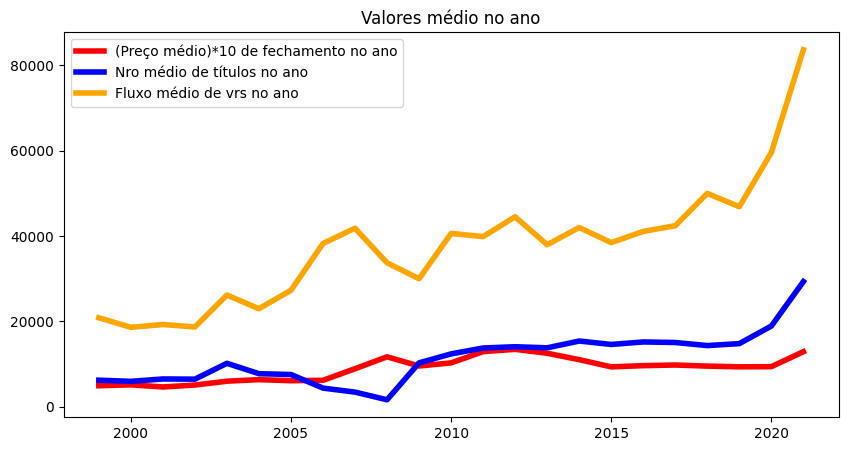

In [ ]:
# plotando a evolução de algumas valores mais importantes na transação de títulos (contratos) por ano
# obs: média anual dos valores
fig,ax = plt.subplots(ncols=1,figsize=(10,5))

plt.plot(df_milk_ano.Year, df_milk_ano.Close*10, label = "(Preço médio)*10 de fechamento no ano", linewidth=4, color='red') 
plt.plot(df_milk_ano.Year, df_milk_ano.Volume, label = "Nro médio de títulos no ano", linewidth=4, color='blue') 
plt.plot(df_milk_ano.Year, df_milk_ano.Open_Interest, label = "Fluxo médio de vrs no ano", linewidth=4, color='orange')  

plt.title('Valores médio no ano')
plt.legend() 

plt.savefig('grafic_image/valores_medio_ano.png', format='png')
plt.show()

Observamos que a média dos valores de fechamento, nro de títulos negociados e fluxo de valores transacionados de 1999 a 2020 tiveram um crescimento mais uniforme, tendo uma alta mais brusca de 2020 a 2021.
*Obs: o preço médio de fechamento foi multiplicado por 10 para fins de facilitar a comparação da curva da evolução dos valores com as demais curvas.

In [ ]:
# salva os dados tratados em arquivo csv organizado pelo índice
df_milk.sort_index().to_csv('df_treated/df_milk_treated.csv', index=False)